# Прогнозирование оттока клиентов

## Описание проекта

**Цель:** Оператору связи необходимо научисться прогнозировать отток клиентов для планирования предиктивных мер (скидок, особых условий).
Для выборки клиентов доступны персональные данные, информация о тарифах и договорах.
Информация о договорах актуальна на 1 февраля 2020.

* Основная метрика для проверки качества модели: `roc_auc`
* Дополнительная метрика для проверки качества модели: `accuracy`


### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.


### Описание данных
* `contract.csv` — информация о договоре;
* `personal.csv` — персональные данные клиента;
* `internet.csv` — информация об интернет-услугах;
* `phone.csv` — информация об услугах телефонии.

**Содержание** 
  

<div class="toc"><ul class="toc-item">
<li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li>
<li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li>
<li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li>
<li><span><a href="#Обучение-и-анализ-моделей" data-toc-modified-id="Обучение-и-анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение и анализ моделей</a></span></li>
<li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li>


## Изучение данных из файла

Импортируем все нужные библиотеки

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from catboost import CatBoostClassifier

In [5]:
phone = pd.read_csv(r'C:\project_jupyter\final_modul\phone.csv', index_col='customerID')
personal = pd.read_csv(r'C:\project_jupyter\final_modul\personal.csv', index_col='customerID')
internet = pd.read_csv(r'C:\project_jupyter\final_modul\internet.csv', index_col='customerID')
contract = pd.read_csv(r'C:\project_jupyter\final_modul\contract.csv', index_col='customerID')


phone = pd.read_csv(r'/datasets/final_provider/phone.csv', index_col='customerID')
personal = pd.read_csv(r'/datasets/final_provider/personal.csv', index_col='customerID')
internet = pd.read_csv(r'/datasets/final_provider/internet.csv', index_col='customerID')
contract = pd.read_csv(r'/datasets/final_provider/contract.csv', index_col='customerID')

In [6]:
pv = [phone,personal,internet,contract]

In [7]:
for p in pv:
    display(p.head())

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
for p in pv:
    display(p.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


None

In [9]:
for p in pv:
    display(p.describe())

,MultipleLines
count,6361
unique,2
top,No
freq,3390


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


**Вывод:** 

При первичном осмотре данных вижу следующие проблемы в данных:

Типы данных:
* TotalCharges - нужен числовой тип данных
* BeginDate - нужен тип данных даты
* EndDate - нужен тип данных даты(но там пропуски поэтому 


Нужно закодировать многие столбцы, где два значения, и соотвественно поменять там типы данных

Я делаю вывод, что где заполнен столбец EndDate значит клиент ушел, соотвественно это целевой столбец.

## Подготовка данных

In [10]:
contract = contract.drop(contract.loc[contract['TotalCharges'] == ' '].index)

Удалим индексы с пустыми данными в стоблце(их всего 11)

In [11]:
contract['purpose'] = contract['EndDate']
contract.loc[contract['purpose'] == 'No', 'purpose'] = 0
contract.loc[contract['purpose'] != 0, 'purpose'] = 1

In [12]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')
contract['BeginDate'] = contract['BeginDate'].astype('datetime64')

In [13]:
contract.loc[contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
contract['EndDate'] = contract['EndDate'].astype('datetime64')

Вычислим количество дней в течении которых пользователь пользуется(пользовался) услугами

In [14]:
contract['total_days'] =  (contract['EndDate'] - contract['BeginDate']) // np.timedelta64(1, 'D')

In [15]:
contract = contract.drop(['BeginDate', 'EndDate'], axis=1)#удалим ненужные нам столбцы

In [16]:
contract.head(15)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,purpose,total_days
customerID,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61
9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,820.50,1,245
1452-KIOVK,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,671
6713-OKOMC,Month-to-month,No,Mailed check,29.75,301.90,0,306
7892-POOKP,Month-to-month,Yes,Electronic check,104.80,3046.05,1,853


**Кодирование**

Используем прямое кодирование к таблицам, чтобы закодировать признаки в столбцах

In [17]:
encoder = OrdinalEncoder()

phone = pd.DataFrame(encoder.fit_transform(phone),columns=phone.columns, index = phone.index)
personal = pd.DataFrame(encoder.fit_transform(personal),columns=personal.columns, index = personal.index)
internet = pd.DataFrame(encoder.fit_transform(internet),columns=internet.columns, index = internet.index)


In [18]:
encoder.fit(contract[['Type','PaperlessBilling','PaymentMethod']])
contract[['Type','PaperlessBilling','PaymentMethod']] = encoder.transform(contract[['Type','PaperlessBilling','PaymentMethod']])

Получили таблицы с закодированными переменными

**Объединение таблиц**

In [19]:
final = contract.join(personal,how='left').join(phone, how='left').fillna(-1).join(internet, how='left').fillna(-1)#заполним пропуски в 

In [20]:
final.head(15)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,purpose,total_days,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,1.0,2.0,29.85,29.85,0,31,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5575-GNVDE,1.0,0.0,3.0,56.95,1889.50,0,1036,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3668-QPYBK,0.0,1.0,3.0,53.85,108.15,1,61,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7795-CFOCW,1.0,0.0,0.0,42.30,1840.75,0,1371,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
9237-HQITU,0.0,1.0,2.0,70.70,151.65,1,61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9305-CDSKC,0.0,1.0,2.0,99.65,820.50,1,245,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1452-KIOVK,0.0,1.0,1.0,89.10,1949.40,0,671,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6713-OKOMC,0.0,0.0,3.0,29.75,301.90,0,306,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7892-POOKP,0.0,1.0,2.0,104.80,3046.05,1,853,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


Получили таблицу со всем признаками, из всех таблиц, пропуски заполнили (-1)

**Вывод**

Выполнил подготовку данных, удалив 11 столбцов с пропусками, добавил новый столбец с количеством дней пользования услугами.  

Применил порядковое кодирование к таблицам, и объединил таблицы в одну для дальнейшего анализа и построения моделей.

## Анализ данных

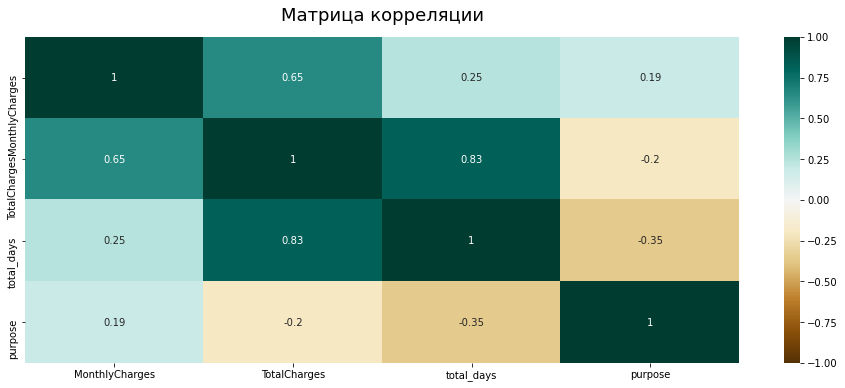

In [21]:
plt.figure(figsize=(16, 6)) 

heatmap = sns.heatmap(final[['MonthlyCharges','TotalCharges','total_days','purpose']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Матрица корреляции', fontdict={'fontsize':18}, pad=16);

* Анализ по платежам в месяц

<AxesSubplot:xlabel='purpose', ylabel='MonthlyCharges'>

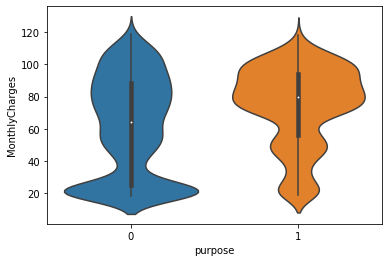

In [19]:
sns.violinplot(x='purpose', y='MonthlyCharges', data=final)


<AxesSubplot:xlabel='purpose', ylabel='MonthlyCharges'>

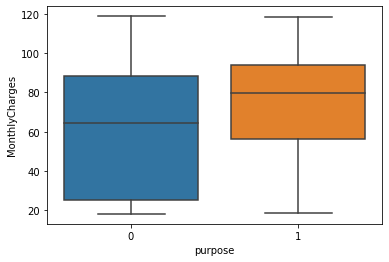

In [20]:
sns.boxplot(x='purpose', y='MonthlyCharges', data=final)



Ушедшие пользователи больше платили в месяц

* Анализ по суммарным платежам

<AxesSubplot:xlabel='purpose', ylabel='TotalCharges'>

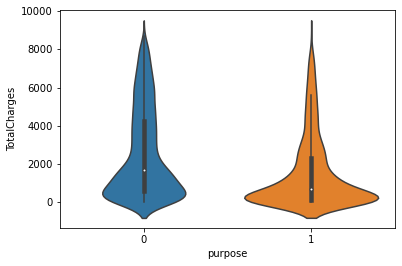

In [21]:
sns.violinplot(x='purpose', y='TotalCharges', data=final)

<AxesSubplot:xlabel='purpose', ylabel='TotalCharges'>

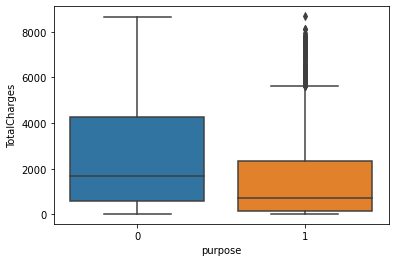

In [22]:
sns.boxplot(x='purpose', y='TotalCharges', data=final)



Сумарные платежи больше у неушедших клиентов

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

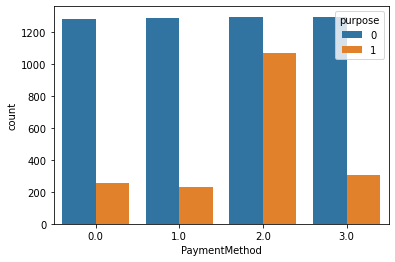

In [23]:
sns.countplot(x='PaymentMethod', hue='purpose', data=final)

<AxesSubplot:xlabel='Type', ylabel='count'>

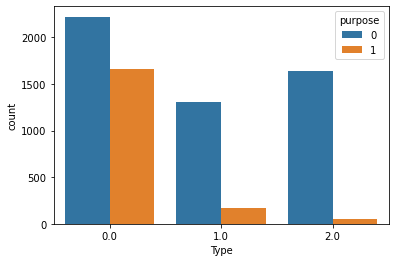

In [24]:
sns.countplot(x='Type', hue='purpose', data=final)

**Вывод:**

В среднем ушедшие клиенты платили в месяц больше, чем оставшиеся 

Многие ушедшие клиенты расплачивались методом 'Electronic check'

Построена матрица корреляции признаков


## Обучение и анализ моделей

In [20]:
final['purpose'].value_counts()

0    5163
1    1869
Name: purpose, dtype: int64

Есть дисбаланс классов, в дальнейшем при разбиение на выборки нужно его учесть

In [21]:
x = final.drop('purpose', axis=1)
y = final['purpose']

In [22]:
x_train, x_valid_0, y_train, y_valid_0 = train_test_split(x, y, test_size=0.4, random_state=12345, stratify=y)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid_0, y_valid_0, test_size=0.5, random_state=12345, stratify=y_valid_0)


In [23]:
display(y_valid.value_counts())
display(y_test.value_counts())
display(y_train.value_counts())

0    1032
1     374
Name: purpose, dtype: int64

0    1033
1     374
Name: purpose, dtype: int64

0    3098
1    1121
Name: purpose, dtype: int64

In [24]:
display(f"Размер тренировочной выборки: {x_train.shape}")
display(f"Размер валидационной выборки: {x_valid.shape}")
display(f"Размер тестовой выборки: {x_test.shape}")

'Размер тренировочной выборки: (4219, 18)'

'Размер валидационной выборки: (1406, 18)'

'Размер тестовой выборки: (1407, 18)'

Выборки разбиты корректно, в каждой из выборок равная доля классов. В дальнейшем обучим и проверим разные модели, выберем лучшую по ROC-AUC 

**Логистическая регрессия**

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)

probabilities_valid = model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_valid = roc_auc_score(y_valid, probabilities_one_valid)


display(f"Roc-auc на валидационной выборке: {auc_roc_valid:.3f}")
display(f"accuracy на валидационной выборке: {accuracy_score(y_valid, model.predict(x_valid)):.3f}")

probabilities_test = model.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(y_test, probabilities_one_test)

display(f"Roc-auc на тестовой выборке: {auc_roc:.3f}")
display(f"accuracy на тестовой выборке: {accuracy_score(y_test, model.predict(x_test)):.3f}")

'Roc-auc на валидационной выборке: 0.847'

'accuracy на валидационной выборке: 0.804'

'Roc-auc на тестовой выборке: 0.843'

'accuracy на тестовой выборке: 0.808'

**Модель случайного леса**

In [26]:
param_grid = {'n_estimators': [300],
              'max_depth': [5, 7, 9],
              'max_features': [3, 5, 7]
             }

model_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = model_rf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'roc_auc')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9], 'max_features': [3, 5, 7],
                         'n_estimators': [300]},
             scoring='roc_auc')

In [27]:
display('Лучшие параметры модели: ', grid_search_rf.best_params_)

pred_rf_valid = grid_search_rf.best_estimator_.predict_proba(x_valid)[:, 1]
roc_auc_rf_t_valid = roc_auc_score(y_valid, pred_rf_valid)
display(f"roc_auc для модели Random Forest на валидационной выборке: {roc_auc_rf_t_valid:.3f}")
display(f"accuracy для модели Random Forest на валидационной выборке: {accuracy_score(y_valid, grid_search_rf.best_estimator_.predict(x_valid)):.3f}")


pred_rf = grid_search_rf.best_estimator_.predict_proba(x_test)[:, 1]
roc_auc_rf_t = roc_auc_score(y_test, pred_rf)
display(f"roc_auc для модели Random Forest на тестовой выборке: {roc_auc_rf_t:.3f}")
display(f"accuracy для модели Random Forest на тестовой выборке: {accuracy_score(y_test, grid_search_rf.best_estimator_.predict(x_test)):.3f}")


'Лучшие параметры модели: '

{'max_depth': 7, 'max_features': 7, 'n_estimators': 300}

'roc_auc для модели Random Forest на валидационной выборке: 0.864'

'accuracy для модели Random Forest на валидационной выборке: 0.814'

'roc_auc для модели Random Forest на тестовой выборке: 0.866'

'accuracy для модели Random Forest на тестовой выборке: 0.825'

**Cat Boost**

In [28]:
param_grid = {'iterations': [800, 1000],
              'depth': [5, 7, 9],
              
             }

model_cb = CatBoostClassifier()
grid_search_cb = GridSearchCV(estimator = model_cb,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'roc_auc')
grid_search_cb.fit(x_train, y_train, verbose=100)

Learning rate set to 0.021251
0:	learn: 0.6788983	total: 302ms	remaining: 4m 1s
100:	learn: 0.3887139	total: 660ms	remaining: 4.57s
200:	learn: 0.3611255	total: 842ms	remaining: 2.51s
300:	learn: 0.3450891	total: 1.02s	remaining: 1.69s
400:	learn: 0.3277323	total: 1.29s	remaining: 1.28s
500:	learn: 0.3085531	total: 1.53s	remaining: 914ms
600:	learn: 0.2932222	total: 1.81s	remaining: 601ms
700:	learn: 0.2792921	total: 2.09s	remaining: 295ms
799:	learn: 0.2668510	total: 2.36s	remaining: 0us
Learning rate set to 0.021251
0:	learn: 0.6794365	total: 1.84ms	remaining: 1.47s
100:	learn: 0.3904313	total: 279ms	remaining: 1.93s
200:	learn: 0.3617242	total: 560ms	remaining: 1.67s
300:	learn: 0.3444877	total: 695ms	remaining: 1.15s
400:	learn: 0.3278617	total: 838ms	remaining: 834ms
500:	learn: 0.3091195	total: 980ms	remaining: 585ms
600:	learn: 0.2950231	total: 1.17s	remaining: 388ms
700:	learn: 0.2817648	total: 1.44s	remaining: 204ms
799:	learn: 0.2707880	total: 1.57s	remaining: 0us
Learning ra

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f75a33062b0>,
             param_grid={'depth': [5, 7, 9], 'iterations': [800, 1000]},
             scoring='roc_auc')

In [29]:
model_cb_best_param=grid_search_cb.best_params_
display('Лучшие параметры модели: ', model_cb_best_param)

model_cb_predict = grid_search_cb.best_estimator_

pred_cb_valid = model_cb_predict.predict_proba(x_valid)[:, 1]
roc_auc_cb_t_valid = roc_auc_score(y_valid, pred_cb_valid)
display(f"roc_auc для модели CatBoost на валидационной выборке: {roc_auc_cb_t_valid:.3f}")
display(f"accuracy для модели CatBoost на валидационной выборке: {accuracy_score(y_valid, grid_search_cb.best_estimator_.predict(x_valid)):.3f}")

pred_cb = model_cb_predict.predict_proba(x_test)[:, 1]
roc_auc_cb_t = roc_auc_score(y_test, pred_cb)
display(f"roc_auc для модели CatBoost на тестовой выборке: {roc_auc_cb_t:.3f}")
display(f"accuracy для модели CatBoost на тестовой выборке: {accuracy_score(y_test, grid_search_cb.best_estimator_.predict(x_test)):.3f}")


'Лучшие параметры модели: '

{'depth': 5, 'iterations': 1000}

'roc_auc для модели CatBoost на валидационной выборке: 0.893'

'accuracy для модели CatBoost на валидационной выборке: 0.845'

'roc_auc для модели CatBoost на тестовой выборке: 0.895'

'accuracy для модели CatBoost на тестовой выборке: 0.853'

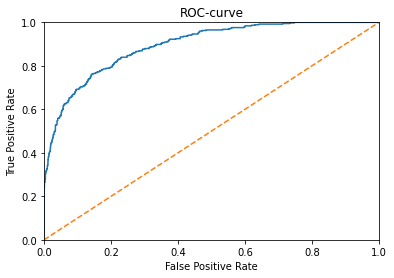

In [30]:
def make_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()
    
make_roc_curve(y_test, pred_cb)

In [36]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(model_cb_predict, x_test)
display(fi)

,cols,imp
5,total_days,49.460602
0,Type,10.211906
3,MonthlyCharges,7.463225
4,TotalCharges,7.189144
11,InternetService,3.398525
2,PaymentMethod,2.991459
15,TechSupport,2.498106
10,MultipleLines,2.193264
12,OnlineSecurity,1.962068
17,StreamingMovies,1.926314


In [38]:
d = {'roc_auc_test': [0.843, 0.864, 0.895], 'accuracy_test': [0.808, 0.831, 0.853]}
pd.DataFrame(data=d, index=['Логистическая регрессия', 'Случайный лес', 'CatBoost'])

,roc_auc_test,accuracy_test
Логистическая регрессия,0.843,0.808
Случайный лес,0.864,0.831
CatBoost,0.895,0.853


## Вывод

Была проведена предобработка и анализ данных, были получены следующие выводы:
* ушедшие клиенты платили в месяц больше, чем те кто остались
* многие ушедшие клиенты расплачивались методом 'Electronic check'
Обучены различные модели (логистической регрессии, случайного леса, CatBoost). Для проверки качества моделей использовались метрики roc_auc и accuracy.

Наилучшее качество предсказания показала модель градиентного бустинга (CatBoost). roc_auc = 0.895 на тестовой выборке, accuracy = 0.853
Наибольший вклад в предсказание модели вносят признаки:
* total_days - количество дней пользования услугами
* Type - тип платежей (ежемесячный, ежегодный, раз в два года)
* MonthlyCharges - ежемесячный платёж за услуги. 
* TotalCharges - общая сумма, которую клиент заплатил за всё время услуг